# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

Max Likelihood:

$$p(X|\mu,\tau)=\prod^{n}_{i=1}p(x_{i}|\mu,\tau)=\frac{1}{(2\pi)^{n/2}}\tau^{n/2}\exp{\big(-\frac{\tau}{2}\sum^{n}_{i=1}(x_{i}-\mu)^2\big)}$$

Th conjugate prior is the normal-Gamma defined as:

$$Gamma(\tau|a,b)=\frac{1}{\Gamma(a)}b^{a}\lambda^{a-1}\exp{(-b\lambda)}$$

Posterior probability distribution formula (for our case):

$$p(\mu,\tau|X)\propto p(X|\mu,\tau)p(\mu,\tau)$$

Substituting the above mentioned formulas:

\begin{align}
    p(\mu,\tau|X)
        &\propto\frac{1}{\big(2\pi)^{n/2}}\tau^{n/2}\exp{\big(-\frac{\tau}{2}\sum_{i=1}^{n}(x_i-\mu)^2\big)}\frac{b^2\sqrt{\beta}}{\Gamma(a)\sqrt{2\pi}}\tau^{a-1/2}\exp{\big(-\frac{\tau}{2}(\beta(\mu-\mu_{0})^2+2b)\big)}
        \\
        &\propto\frac{b^{a}\sqrt{\beta}}{\Gamma(a)\sqrt{2\pi}}\frac{\tau^{\frac{n}{2}-\frac{1}{2}+a}}{(2\pi)^{n/2}}\exp{\big(-\frac{\tau}{2}(\sum^{n}_{i=1}(x_i-\mu)^2+\beta(\mu-\mu_{0})^2+2b)\big)}
\end{align}

Reference:

1. Bishop, C., "Pattern Recognition and Machine Learning." The Gaussian Distribution, 2.3.6 Bayesian Inference for the Gaussian, p.97 - 101

2. https://en.wikipedia.org/wiki/Normal-gamma_distribution

3. Murphy, K., "Conjugate Bayesian analysis of the Gaussian distribution", 3. Normal Gamma, p.6 - 10

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
class Hessian:
    def norm(self, w):
        return stats.multivariate_normal(mean = [0,0,0], cov=cov).pdf(w)

    def sigma(self, w):
        return (1 + np.exp(-(np.transpose(w) @ x)))

    def func(self, w):
        return self.norm(w) / self.sigma(w)

    def log_func(self, w):
        return -np.log(self.func(w))

    def hessian(self, w):
        return nd.core.Hessian(self.log_func)(w)

    def predict(self, w):
        return self.func(w) * (np.sqrt(2 * np.pi))**3 / np.sqrt(np.abs(np.linalg.det(self.hessian(w))))
hes = Hessian()
x = np.array([2/3, 1/6, 1/6])
cov = np.array([[1,-0.25,0.75],[-0.25,1,0.5],[0.75,0.5,2]])
w = minimize(hes.log_func, x0=[0,0,0]).x
results = hes.predict(w)
print('The value of integral: {}'.format(results))

The value of integral: 0.49791972206944296


<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [4]:
import torch
from torch.autograd import Variable, grad

In [5]:
tx = Variable(torch.FloatTensor(x))
tcov = Variable(torch.FloatTensor(cov))

In [6]:
def norm(w):
        return stats.multivariate_normal(mean = [0,0,0], cov=cov).pdf(w)
def sigma(w):
        return (1 + np.exp(-(np.transpose(w) @ x)))
def func(w):
        return norm(w) / sigma(w)
def log_func(w):
        return -np.log(func(w))   

In [7]:
def tNorm(w):
    return (2*np.pi)**(3/2) * np.sqrt(np.linalg.det(cov))

def tSigma(w):
    return torch.sigmoid(w @ tx)

def tfunc(w):
    return (tSigma(w)/tNorm(w))*(torch.exp(-0.5*w @ torch.inverse(tcov) @ w))

def tlog_func(w):
    return -torch.log(tfunc(w))

def tHessian(w, tlog_func, n):
    tw = torch.tensor(w, requires_grad = True).float()
    f_values = tlog_func(tw)
    grad = torch.autograd.grad(f_values, tw, create_graph=True)[0]
    result = np.zeros(shape=(n, n))
    for i in range(n):
        result[:,i] = torch.autograd.grad(grad[i], tw, create_graph=True)[0].data.numpy()
        
    return np.diag(np.diag(result))

In [8]:
w = minimize(log_func, x0 = [0,0,0]).x
n = w.size
x = np.array([2/3, 1/6, 1/6])
tx = Variable(torch.FloatTensor(x))
tw = torch.FloatTensor(w)

tresults = tfunc(tw) * (2 * np.pi)**(3/2) / np.sqrt(np.abs(np.linalg.det(tHessian(tw, tlog_func, n))))
tresults=np.array(tresults)
print('The value of integral: {}'.format(tresults))

The value of integral: 0.29643094539642334


<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [9]:
Monte_carlo = np.mean(1./(np.exp(-stats.multivariate_normal.rvs(np.zeros(3), cov, size=100500)@x)+1))

In [10]:
print('Relative error, 1 case:', round(abs(Monte_carlo - results)/Monte_carlo,3))
print('Relative error, 2 case', round(abs(Monte_carlo- tresults)/Monte_carlo,3))

Relative error, 1 case: 0.004
Relative error, 2 case 0.407


**BEGIN Solution**

For Hessian (2 case), the relative error of the integral is due to diagonal approxiamtion resulting the loss of data.

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**
    \begin{equation}
        \begin{bmatrix} A & B \\ C & D \end{bmatrix} =
        \left[\begin{array}{cc|cc}
        A & B & I & 0 \\
        C & D & 0 & I
        \end{array} \right]\stackrel{1^{st} row\cdot A^{-1}}{\longrightarrow}
        \left[\begin{array}{cc|cc}
        I & A^{-1}B & A^{-1} & 0 \\
        C & D & 0 & I
        \end{array} \right]\stackrel{2^{nd}row - 1^{st}row\cdot CA^{-1}B}{\longrightarrow}
        \left[\begin{array}{cc|cc}
        I & A^{-1}B & A^{-1} & 0 \\
        0 & D-CA^{-1}B & -CA^{-1} & I
        \end{array} \right]\stackrel{2^{nd}row \cdot (D-CA^{-1}B)^{-1}}{\longrightarrow}
        \left[\begin{array}{cc|cc}
        I & A^{-1}B & A^{-1} & 0 \\
        0 & (D-CA^{-1}B)(D - CA^{-1}B)^{-1} & -CA^{-1}(D - CA^{-1}B)^{-1} & (D - CA^{-1}B)^{-1}
        \end{array} \right] =
        \left[\begin{array}{cc|cc}
        I & A^{-1}B & A^{-1} & 0 \\
        0 & I & -CA^{-1}(D - CA^{-1}B)^{-1} & (D - CA^{-1}B)^{-1}
        \end{array} \right]\stackrel{1^{st}row - A^{-1}B\cdot 2^{nd}row}{\longrightarrow}
        \left[\begin{array}{cc|cc}
        I & 0 & A^{-1} + A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D-CA^{-1}B)^{-1} \\
        0 & I & -(D-CA^{-1}B)^{-1}CA^{-1} & (D-CA{-1}B)^{-1}
        \end{array} \right]
    \end{equation}
**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

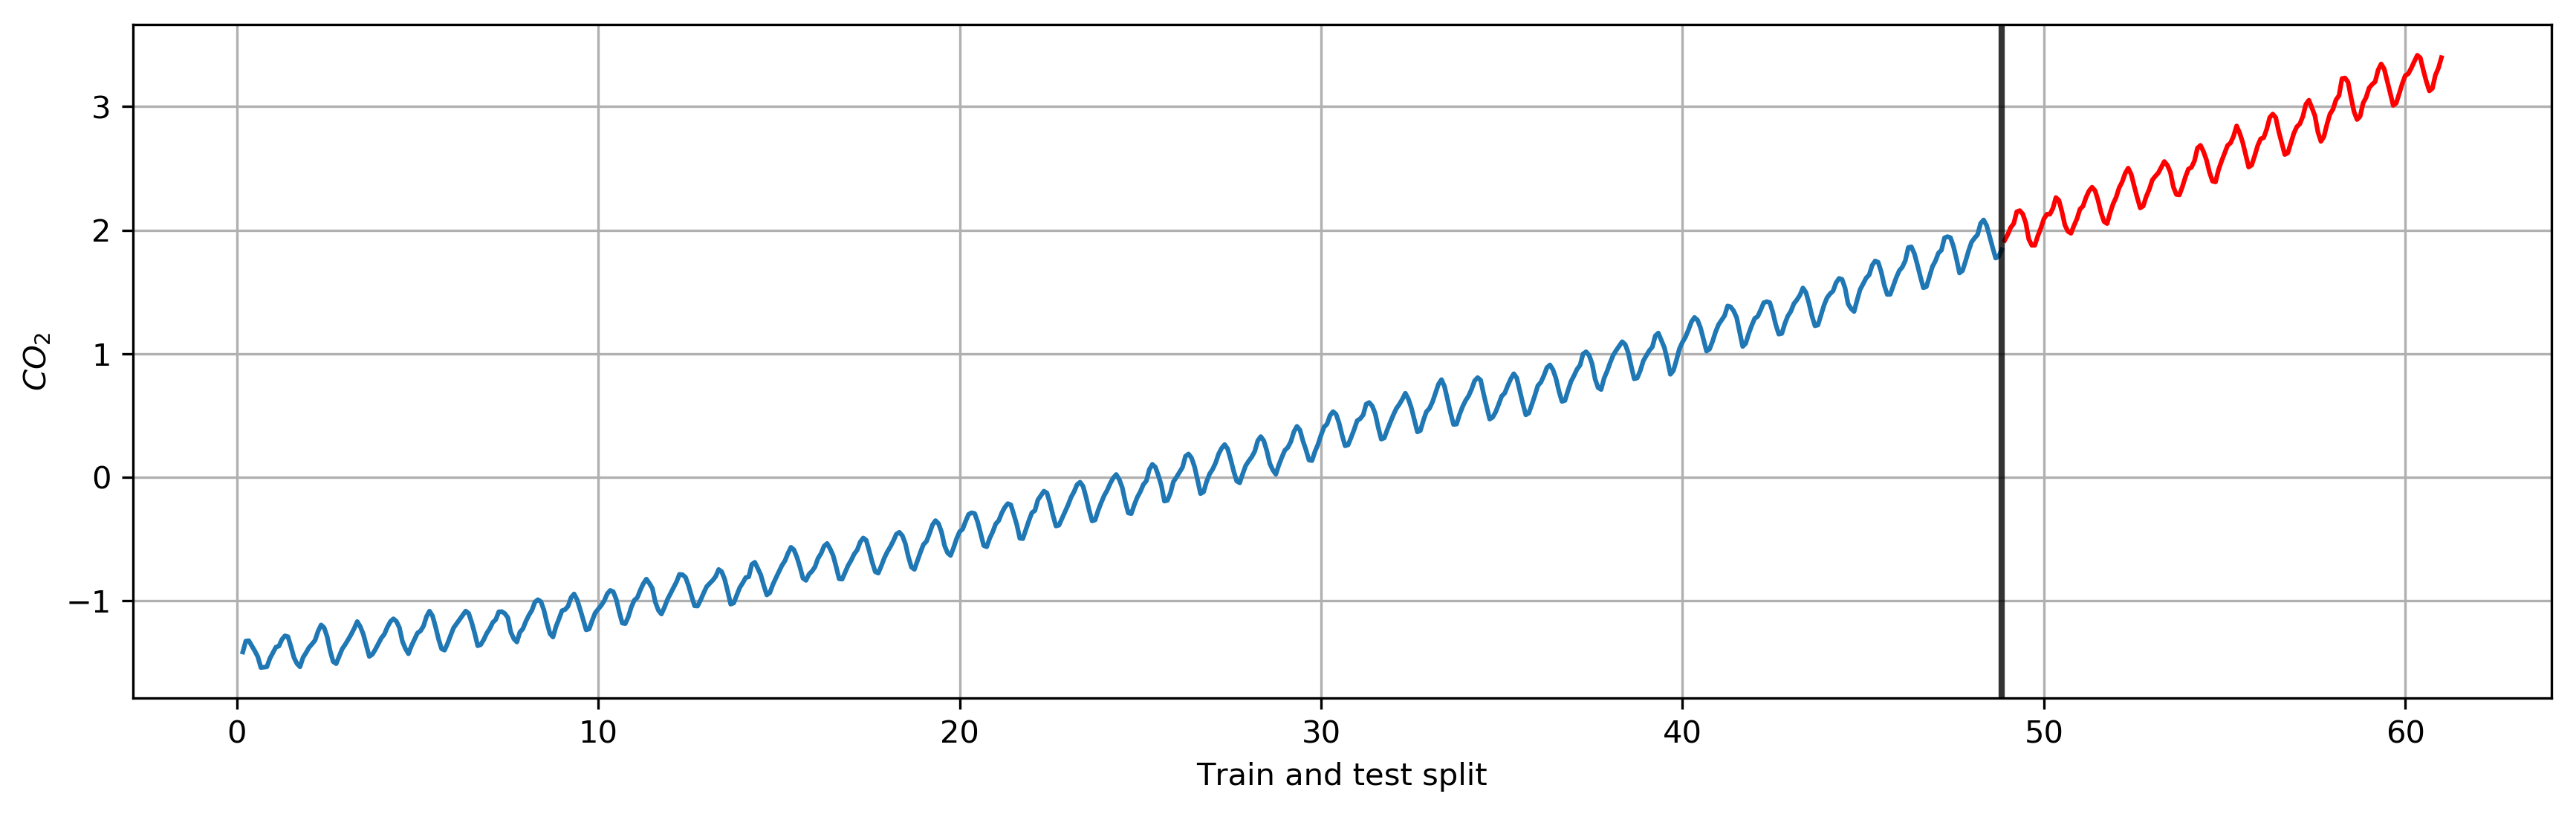

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

%matplotlib inline

### BEGIN Solution

df = pd.read_csv('data/monthly_co2_mlo.csv', index_col='year')
df.replace(to_replace=-99.99, value = np.NaN, inplace = True)
# df.sort_values('year')
df.dropna(axis=0, inplace=True)

data = df[['CO2 [ppm]']]

ind = data.index - 1958
data.index = ind

X_train, X_test = train_test_split(data, train_size = 0.8, shuffle = False, random_state = 42)

ind_train = ind[:len(X_train)]
ind_test = ind[len(X_train):]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1)).ravel()
X_test_scaled = scaler.transform(X_test.values.reshape(-1,1)).ravel()

train = pd.Series(X_train_scaled, index=ind_train)
test = pd.Series(X_test_scaled, index=ind_test)

plt.figure(figsize = (14,4), dpi=300)
train.plot(grid=True)
test.plot(grid=True, c='r')
plt.ylabel(r'$CO_{2}$')
plt.xlabel('Train and test split')
plt.axvline(x=ind_train.values[-1], linewidth=2, color='black', alpha=0.8);
### END Solution

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [12]:
import GPy
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score
import scipy

In [13]:
def plot_model(model,X_train, y_train, xlim=None ):
    if xlim is None:
        xmin = np.min(model.X)
        xmax = np.max(model.X)
        x_range = xmax - xmin
        xlim = [xmin - 0.17*x_range,
                xmax + 0.17*x_range]
    
    x = np.linspace(xlim[0], xlim[1], 300).reshape(-1, 1)
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    
    plt.figure(figsize = (14,4), dpi=300)
    plt.plot(x, prediction, label='Mean')
    plt.plot(X_train.reshape(-1,1), y_train, 'xk', label='Data')
    plt.fill_between(x.ravel(), prediction - std, prediction + std, alpha=0.3, label='Confidence')
    plt.legend();

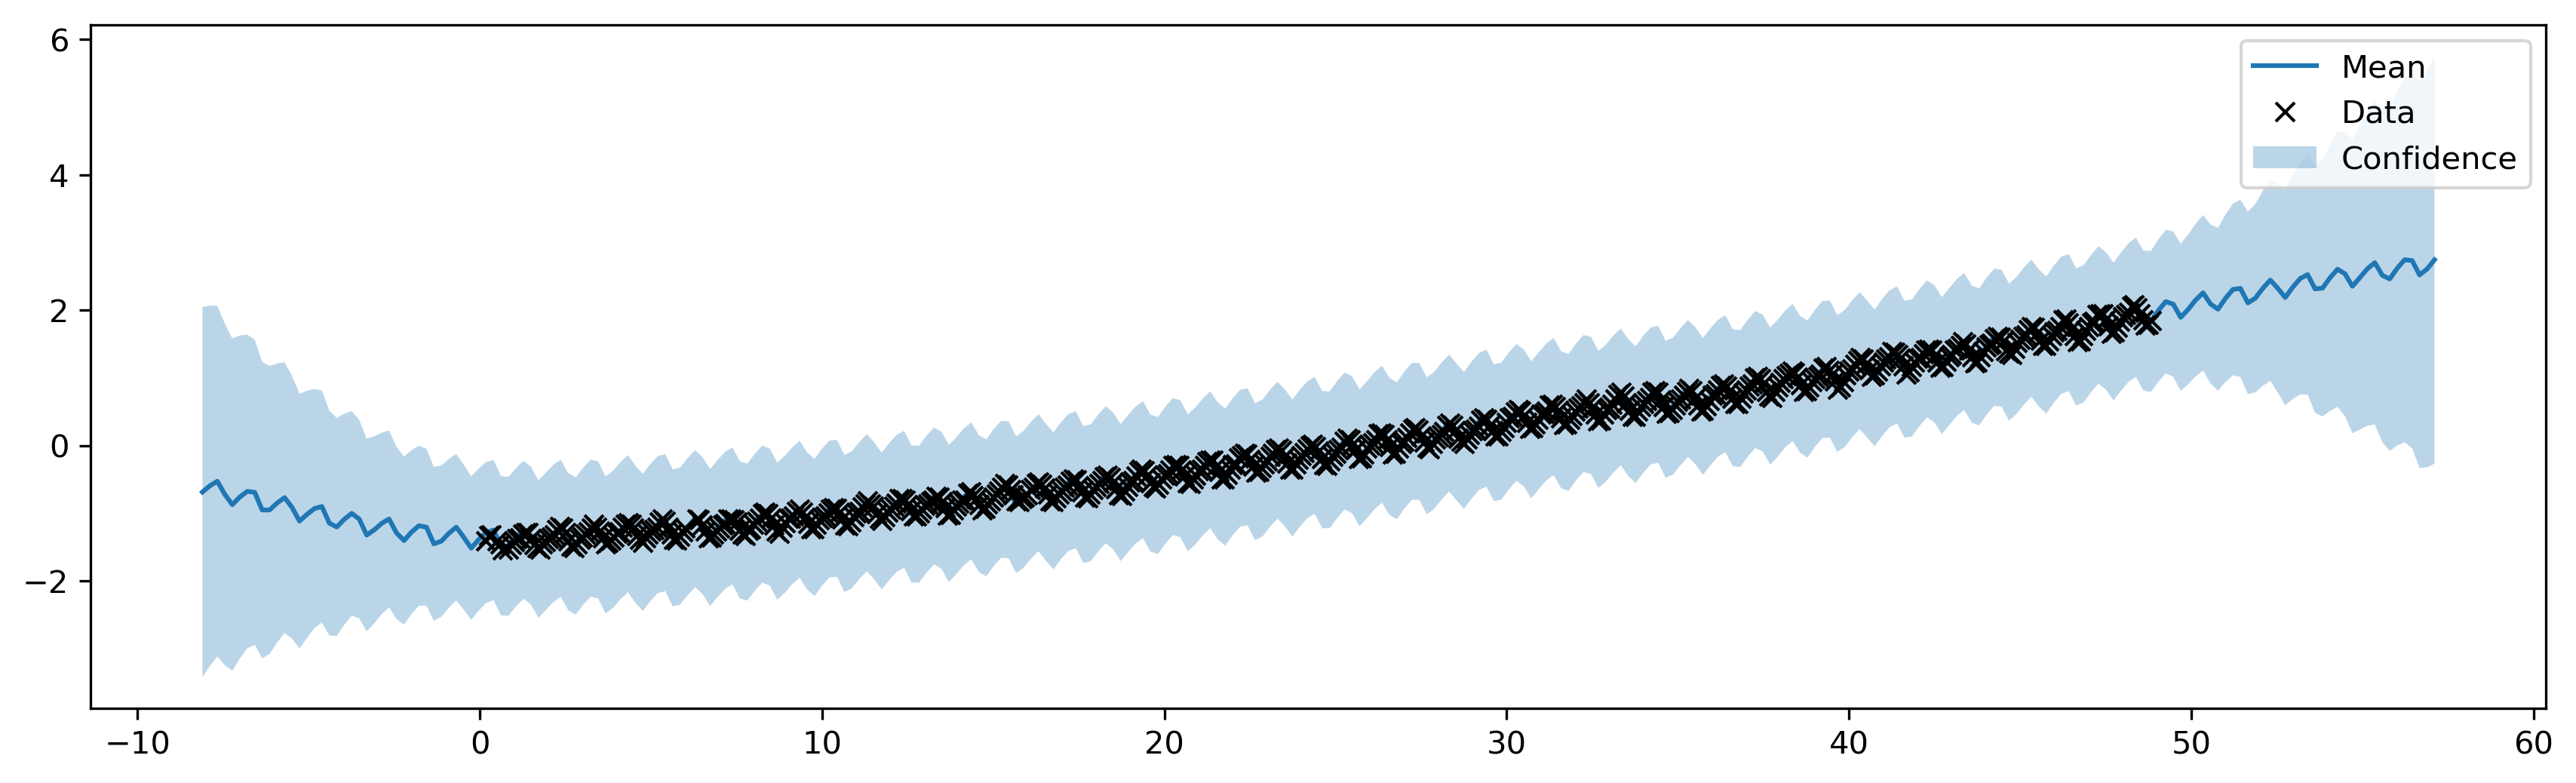

In [14]:
rbf = RBF(1, variance=1, lengthscale=5) 
poly = Poly(1) 
stdp = StdPeriodic(1)

combined = rbf + poly + stdp

model = GPRegression(X_train.index.values.reshape(-1,1), train.values.reshape(-1,1), kernel = combined)

plot_model(model, X_train.index.values, train.values)

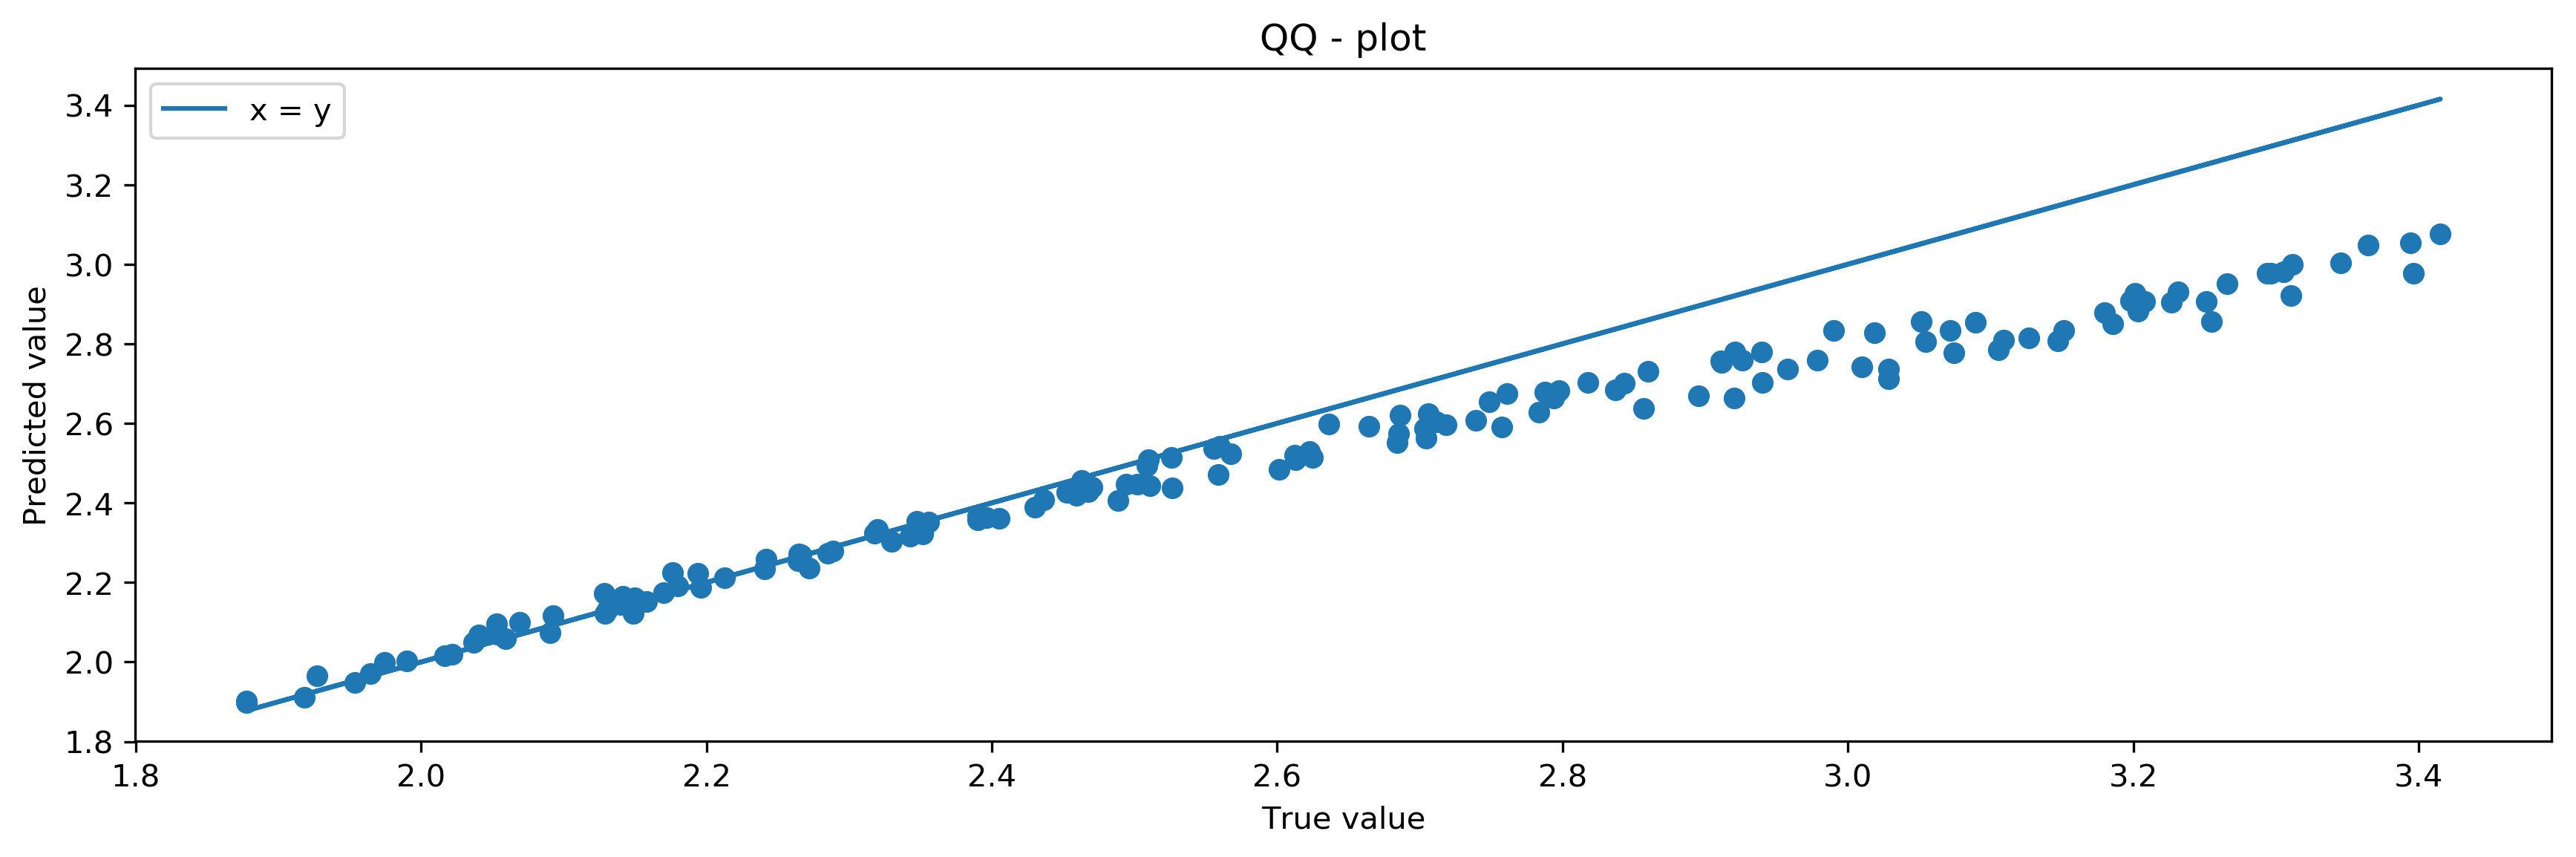

In [15]:
pred = model.predict(X_test.index.values.reshape(-1,1))[0]
plt.figure(figsize = (14,4), dpi=300)
plt.scatter(test.values, pred)
plt.plot(test.values, test, label = 'x = y')
plt.title('QQ - plot')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend();

In [16]:
r2_score(test.values, pred)

0.8341395833430464